In [4]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [5]:
from google.colab import files
uploaded = files.upload()

Saving BBC_08_APR_17_to_08_JUN_2017.csv to BBC_08_APR_17_to_08_JUN_2017 (1).csv


In [6]:
bbc = pd.read_csv("BBC_08_APR_17_to_08_JUN_2017.csv")
bbc.head()

,article,date,panda_date,headline,summary,url
0,Syria war: US warns of 'more' after missile st...,Saturday 08 April 2017,8-Apr-17,US warns Syria it's ready for 'more',Its ambassador to the UN says America will not...,http://www.bbc.com/news/world-middle-east-3952...
1,"Stockholm lorry rams crowds, killing 'at least...",Saturday 08 April 2017,8-Apr-17,Deaths as lorry rams Swedish store,At least four people are reported killed in a ...,http://www.bbc.com/news/world-europe-39531108
2,DR Congo: Bruno Tshibala appointed new prime m...,Saturday 08 April 2017,8-Apr-17,New PM Tshibala appointed in DR Congo,The appointment is likely further divide oppon...,http://www.bbc.com/news/world-africa-39536132
3,Norway to build landmark ship tunnel Norway is...,Saturday 08 April 2017,8-Apr-17,Norway to build landmark ship tunnel,The country is taking radical steps to try and...,http://www.bbc.com/news/world-europe-39521570
4,Trump to make China visit after hosting Xi for...,Saturday 08 April 2017,8-Apr-17,Trump to make China state visit,Mr Trump accepts the Chinese President Xi Jinp...,http://www.bbc.com/news/world-us-canada-39535828


In [7]:
bbc['article'][0]

'Syria war: US warns of \'more\' after missile strikes The US envoy to the UN has warned America may take further action after bombarding a Syrian air base suspected of using chemical weapons. Nikki Haley said her country would not stand by when chemical weapons were used, as it was in its "vital interest" to stop their proliferation. Syrian ally Russia accused the US of encouraging "terrorists" with its unilateral actions. Moscow has promised to strengthen its ally Syria\'s anti-aircraft defences.  It is also closing down a hotline with the US designed to avoid collisions between their air forces over Syria. At least six people are reported to have been killed in the US missile strikes early on Friday. US officials say the base was used to launch a chemical weapons attack that killed dozens of civilians on Tuesday. According to Idlib\'s opposition-run health authority, 89 people, including 33 children and 18 women, died in the suspected nerve agent attack in the rebel-held town of Kha

In [8]:
bbc['headline'][0]

"US warns Syria it's ready for 'more'"

Average length of headlines

In [9]:
bbc['word_titles'] = bbc['headline'].apply(lambda x: len(x.split()))

In [10]:
bbc.describe()

,word_titles
count,988.000000
mean,6.167004
std,1.028196
min,3.000000
25%,5.000000
50%,6.000000
75%,7.000000
max,10.000000


Text(0.5, 1.0, 'Distribution of number of words in the BBC news headlines')

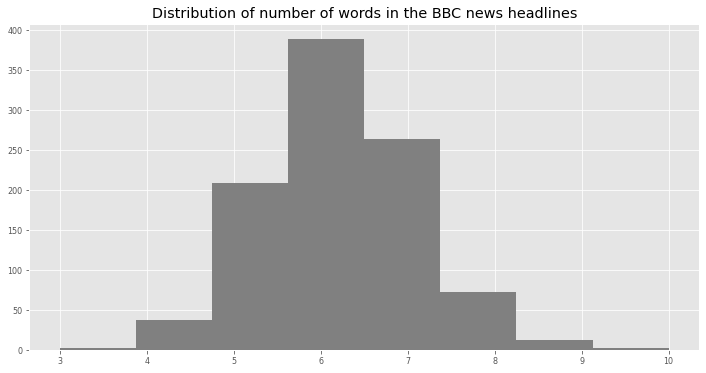

In [11]:
bbc[['word_titles']].hist(figsize=(12,6), bins=8, xlabelsize=8, ylabelsize=8,color='grey')
plt.title("Distribution of number of words in the BBC news headlines")

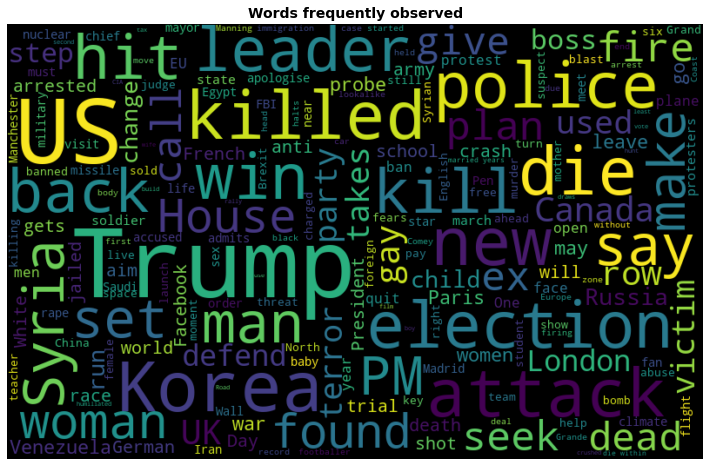

In [12]:
all_words = ''.join([word for word in bbc['headline'][0:100000]])
# all_words
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Words frequently observed',weight='bold',fontsize=14)
plt.show()


size indicates the frequency

In [13]:
 from sklearn.feature_extraction.text import TfidfVectorizer
 vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [14]:
dtm = vectorizer.fit_transform(bbc['article'].values.astype('U'))
# astype('U) - telling the numpy to convert data to unicode(string)
dtm

<988x12545 sparse matrix of type '<class 'numpy.float64'>'
	with 156988 stored elements in Compressed Sparse Row format>

In [15]:
# no of words identified by dtm
words = np.array(vectorizer.get_feature_names())
print(len(words))

12545


### **NMF**

In [16]:
from sklearn.decomposition import NMF
import random

In [25]:
nmf_mod = NMF(n_components=15,random_state=42)
nmf_mod.fit(dtm)
# n_components - is basically no of topics i choose
# we will have to use hit and trial to actually see what no will actually make sense.

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=15, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [26]:
# we also want to get most likely words that contributed to finding the topic.
for index, topic in enumerate(nmf_mod.components_):
  print(f"The top 15 words for Topic#{index}")
  print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-15:]])
# we want 10 words for each topic
# components_ is the H matrix(topic by term)

The top 15 words for Topic#0
['women', 'told', 'murder', 'woman', 'facebook', 'ms', 'school', 'year', 'man', 'mr', 'family', 'death', 'court', 'police', 'said']
The top 15 words for Topic#1
['launch', 'ballistic', 'military', 'missiles', 'tests', 'test', 'kim', 'china', 'pyongyang', 'south', 'nuclear', 'korean', 'missile', 'north', 'korea']
The top 15 words for Topic#2
['intelligence', 'clinton', 'senate', 'director', 'flynn', 'russian', 'investigation', 'white', 'president', 'house', 'russia', 'fbi', 'trump', 'mr', 'comey']
The top 15 words for Topic#3
['paris', 'party', 'round', 'candidate', 'candidates', 'election', 'ms', 'emmanuel', 'marine', 'mr', 'french', 'france', 'pen', 'le', 'macron']
The top 15 words for Topic#4
['government', 'air', 'weapons', 'al', 'said', 'russian', 'iran', 'rebel', 'assad', 'attack', 'zones', 'russia', 'chemical', 'syrian', 'syria']
The top 15 words for Topic#5
['streets', 'elections', 'mr', 'protesters', 'tear', 'assembly', 'president', 'government', 'v

In [27]:
bbc_topics = nmf_mod.transform(dtm)
# we do this to combine topics to our vectorised articles to attach a number to it

In [40]:
dtm.shape

(988, 12545)

In [41]:
bbc_topics.shape

(988, 15)

In [37]:
bbc_topics[1].argsort()
# so these are basically topic numbers arranged in ascending order
# in terms of most representative topic.

array([ 1,  3,  4,  6,  9, 10, 13,  5,  2,  8, 12, 14, 11,  0,  7])

In [38]:
bbc_topics[1].argmax()

7

In [39]:
bbc_topiclabels = {0:'Crime Victims & Public Safety',
                   1:'Foreign Defense: North Korea',
                   2:'US Politics',
                   3:'Euro: French Politics',
                   4:'International Relations: War & Conflict',
                   5:'Venezuela',
                   6:'US: Foreign Policy',
                   7:'UK Security & Terrorism',
                   8:'UK Politics: Brexit',
                   9:'Latin America Politics',
                   10:'Football',
                   11:'Afghanistan: Terrorism',
                   12:'Travel',
                   13:'Egypt',
                   14:'Turkey'}

In [51]:
bbc['title'] = bbc_topics.argmax(axis=1)
# bbc_topics.argmax(axis=1)
# it is bascially for every document = max representative topic 

In [52]:
bbc['topic_labels'] = bbc['title'].map(bbc_topiclabels)

In [53]:
bbc.head()

,article,date,panda_date,headline,summary,url,word_titles,title,topic_labels
0,Syria war: US warns of 'more' after missile st...,Saturday 08 April 2017,8-Apr-17,US warns Syria it's ready for 'more',Its ambassador to the UN says America will not...,http://www.bbc.com/news/world-middle-east-3952...,7,4,International Relations: War & Conflict
1,"Stockholm lorry rams crowds, killing 'at least...",Saturday 08 April 2017,8-Apr-17,Deaths as lorry rams Swedish store,At least four people are reported killed in a ...,http://www.bbc.com/news/world-europe-39531108,6,7,UK Security & Terrorism
2,DR Congo: Bruno Tshibala appointed new prime m...,Saturday 08 April 2017,8-Apr-17,New PM Tshibala appointed in DR Congo,The appointment is likely further divide oppon...,http://www.bbc.com/news/world-africa-39536132,7,5,Venezuela
3,Norway to build landmark ship tunnel Norway is...,Saturday 08 April 2017,8-Apr-17,Norway to build landmark ship tunnel,The country is taking radical steps to try and...,http://www.bbc.com/news/world-europe-39521570,6,11,Afghanistan: Terrorism
4,Trump to make China visit after hosting Xi for...,Saturday 08 April 2017,8-Apr-17,Trump to make China state visit,Mr Trump accepts the Chinese President Xi Jinp...,http://www.bbc.com/news/world-us-canada-39535828,6,6,US: Foreign Policy


In [57]:
bbc2 = bbc.loc[bbc['title'].isin([0,3,7,8])]
bbc2.head()

,article,date,panda_date,headline,summary,url,word_titles,title,topic_labels
1,"Stockholm lorry rams crowds, killing 'at least...",Saturday 08 April 2017,8-Apr-17,Deaths as lorry rams Swedish store,At least four people are reported killed in a ...,http://www.bbc.com/news/world-europe-39531108,6,7,UK Security & Terrorism
5,British Columbia ends high heel dress code req...,Saturday 08 April 2017,8-Apr-17,Canada province makes high heels optional,Employers in British Colombia will no longer b...,http://www.bbc.com/news/world-us-canada-39536117,6,8,UK Politics: Brexit
6,Uber: We did not steal Google's self-driving t...,Saturday 08 April 2017,8-Apr-17,Uber: We did not steal Google's tech,The ride-sharing company denies it used ideas ...,http://www.bbc.com/news/technology-39536347,7,0,Crime Victims & Public Safety
7,Westminster Bridge attack victim Andreea Crist...,Saturday 08 April 2017,8-Apr-17,Woman injured in Westminster attack dies,"Romanian woman Andreea Cristea, who fell into ...",http://www.bbc.com/news/uk-39525596,6,7,UK Security & Terrorism
8,"YouTube channels need 10,000 views for adverts...",Saturday 08 April 2017,8-Apr-17,YouTube changes ad rules for new channels,YouTube video creators will now have to pass a...,http://www.bbc.com/news/technology-39527043,7,0,Crime Victims & Public Safety


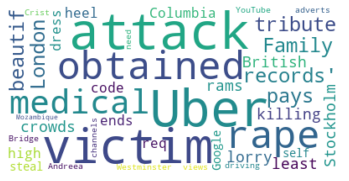

In [58]:
text = str(bbc2.article)
wordcloud = WordCloud().generate(text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_font_size=60, max_words=40, background_color='white').generate(text) 
plt.figure()
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()